In [2]:
from IPython.display import HTML

# Define HTML and CSS to hide code and output
hide_code_html = """
    <script>
        function code_toggle() {
            if (code_shown){
                $('div.input').hide('500');
                $('#toggleButton').val('Show Code')
            } else {
                $('div.input').show('500');
                $('#toggleButton').val('Hide Code')
            }
            code_shown = !code_shown
        }

        $( document ).ready(function(){
            code_shown=false;
            $('div.input').hide()
        });
    </script>
    <form action="javascript:code_toggle()">
        <input type="submit" id="toggleButton" value="Show Code">
    </form>
"""

# Display the HTML to hide code
display(HTML(hide_code_html))


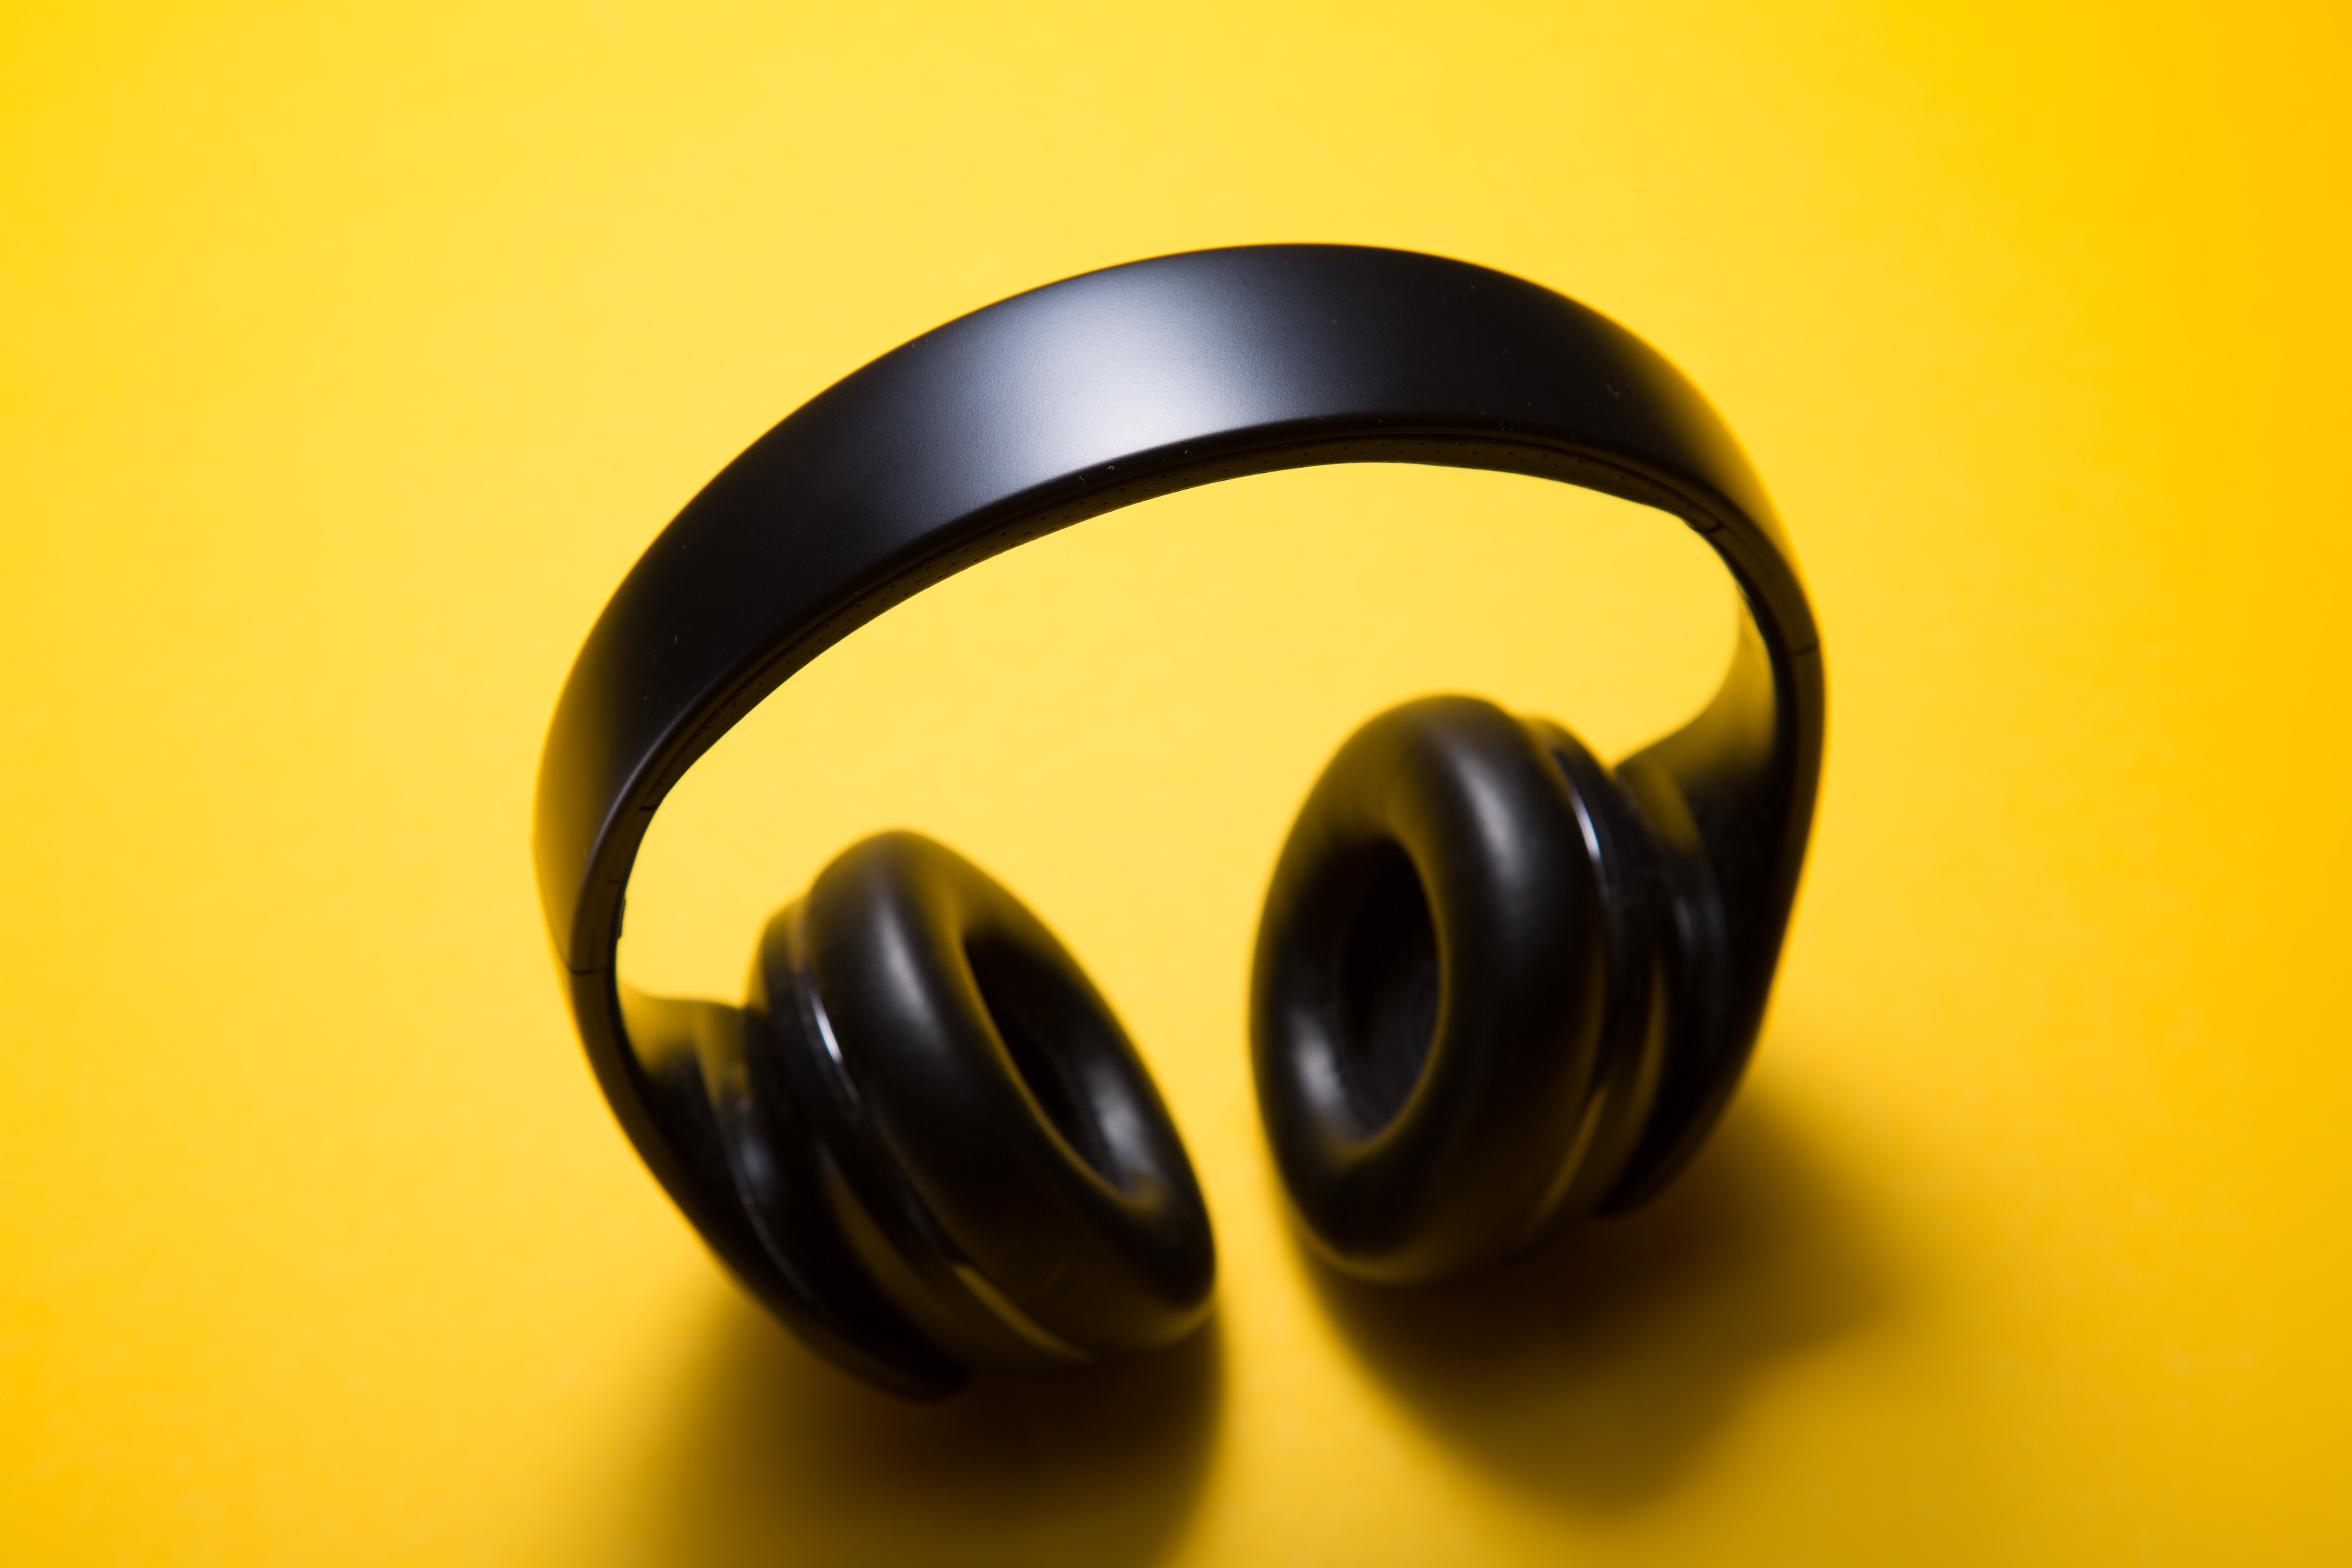

In [1]:
from IPython.display import Image, display
# Specify the path to your image
image_path = r'C:\Users\Ken\Desktop\My Learning\Portfolio Projects\1Million songs\assets\img\project\myprojects\1MillionSongz.jpg'

# Display the image
display(Image(filename=image_path, width=300, height=100))

# 1 Million Songs Recomendation system

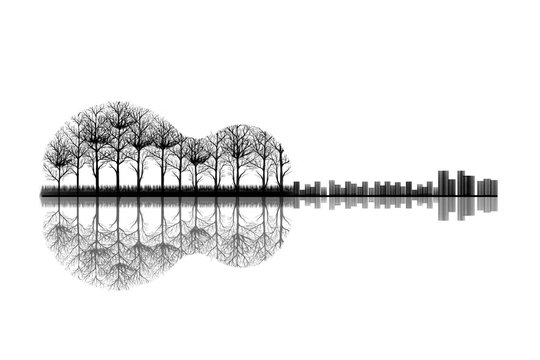

In [2]:
from IPython.display import Image, display

# Specify the path to your image
image_path = r'C:\Users\Ken\Desktop\My Learning\Portfolio Projects\1Million songs\assets\img\project\myprojects\music landscape7.jpeg'

# Display the image
display(Image(filename=image_path, width=500, height=20))

In [3]:
!pip install seaborn
!pip install wordcloud
!pip install dash pandas
!pip install ipywidgets


## Content-Based Recomendation system

The goal of this project is to develop a music recommendation system using python and deploy it on stremlit
By the end of this project we will do:-

1.Comprehensive Data Exploration (EDA)

2.Preprocessing 

3.Feature Engineering

4.Model Development

5.Integration of Features

6.Optimized Model

7.Deployment on Streamlit

### Files Upload
Our data comprises of 2 Spotify csv files of:

1. Different songs and their differen characteristics  including textual features and audio features (df)

2. Different user interaction with different songs (df1)

In [4]:
import pandas as pd
import pickle
# Assuming your file is named 'your_file.csv'
df = pd.read_csv(r'C:\Users\Ken\Desktop\My Learning\Portfolio Projects\1Million songs\Files\Music Info.csv')
df1=pd.read_csv(r'C:\Users\Ken\Desktop\My Learning\Portfolio Projects\1Million songs\Files\User Listening History.csv')

In [5]:
print("Data Overview: Head")
df.head()

Data Overview: Head


,track_id,name,artist,spotify_preview_url,spotify_id,tags,genre,year,duration_ms,danceability,...,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature
0,TRIOREW128F424EAF0,Mr. Brightside,The Killers,https://p.scdn.co/mp3-preview/4d26180e6961fd46...,09ZQ5TmUG8TSL56n0knqrj,"rock, alternative, indie, alternative_rock, in...",NaN,2004,222200,0.355,...,1,-4.360,1,0.0746,0.001190,0.000000,0.0971,0.240,148.114,4
1,TRRIVDJ128F429B0E8,Wonderwall,Oasis,https://p.scdn.co/mp3-preview/d012e536916c927b...,06UfBBDISthj1ZJAtX4xjj,"rock, alternative, indie, pop, alternative_roc...",NaN,2006,258613,0.409,...,2,-4.373,1,0.0336,0.000807,0.000000,0.2070,0.651,174.426,4
2,TROUVHL128F426C441,Come as You Are,Nirvana,https://p.scdn.co/mp3-preview/a1c11bb1cb231031...,0keNu0t0tqsWtExGM3nT1D,"rock, alternative, alternative_rock, 90s, grunge",RnB,1991,218920,0.508,...,4,-5.783,0,0.0400,0.000175,0.000459,0.0878,0.543,120.012,4
3,TRUEIND128F93038C4,Take Me Out,Franz Ferdinand,https://p.scdn.co/mp3-preview/399c401370438be4...,0ancVQ9wEcHVd0RrGICTE4,"rock, alternative, indie, alternative_rock, in...",NaN,2004,237026,0.279,...,9,-8.851,1,0.0371,0.000389,0.000655,0.1330,0.490,104.560,4
4,TRLNZBD128F935E4D8,Creep,Radiohead,https://p.scdn.co/mp3-preview/e7eb60e9466bc3a2...,01QoK9DA7VTeTSE3MNzp4I,"rock, alternative, indie, alternative_rock, in...",RnB,2008,238640,0.515,...,7,-9.935,1,0.0369,0.010200,0.000141,0.1290,0.104,91.841,4


In [6]:
print("Data Overview: Tail")
df.tail()

Data Overview: Tail


,track_id,name,artist,spotify_preview_url,spotify_id,tags,genre,year,duration_ms,danceability,...,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature
50678,TRQYCFV128F9322F50,Ryusei Rocket,アンティック-珈琲店-,https://p.scdn.co/mp3-preview/d2668a5a3e0b1fda...,0tt1RdeJX1RyuU4hMEZ19T,NaN,NaN,2008,273440,0.438,...,6,-3.062,0,0.165,0.003120,0.000000,0.1300,0.421,166.956,4
50679,TRHQCSH128F42724B7,Colors Of The Wind,ACIDMAN,https://p.scdn.co/mp3-preview/8e22a7052ef3ecf7...,3wkdfXGf5JYErW4b35zP2h,"rock, alternative_rock, japanese, cover",NaN,2004,275133,0.351,...,0,-6.811,1,0.120,0.000940,0.000049,0.1920,0.450,200.350,4
50680,TRZRODK128F92D68D7,The Revelation,coldrain,https://p.scdn.co/mp3-preview/4b51a813f67e3853...,1gXMORZRGA40PE9rDE9cja,"metal, metalcore, post_hardcore",NaN,2014,254826,0.434,...,10,-3.092,0,0.268,0.000108,0.001410,0.1630,0.282,158.025,4
50681,TRGLMEM128F9322F63,Koi no Dependence,アンティック-珈琲店-,https://p.scdn.co/mp3-preview/5a61e031df174666...,1dxMDGvIYHFYgRvmw1uMHG,NaN,NaN,2008,243293,0.513,...,4,-3.914,0,0.053,0.000715,0.001350,0.0571,0.618,109.923,4
50682,TRIPFKO128F42383FE,Hide & Seek,9mm Parabellum Bullet,https://p.scdn.co/mp3-preview/91778ba6f91086f4...,3LW19oCCXxiqRcnlcQqPr3,"rock, japanese",Electronic,2008,131960,0.190,...,8,-4.144,1,0.131,0.000033,0.051100,0.2030,0.138,136.475,4


In [7]:
print("\nData Types:")
print(df.dtypes)


Data Types:
track_id                object
name                    object
artist                  object
spotify_preview_url     object
spotify_id              object
tags                    object
genre                   object
year                     int64
duration_ms              int64
danceability           float64
energy                 float64
key                      int64
loudness               float64
mode                     int64
speechiness            float64
acousticness           float64
instrumentalness       float64
liveness               float64
valence                float64
tempo                  float64
time_signature           int64
dtype: object


In [8]:
print("\nMissing Values:")
print(df.isnull().sum())


Missing Values:
track_id                   0
name                       0
artist                     0
spotify_preview_url        0
spotify_id                 0
tags                    1127
genre                  28335
year                       0
duration_ms                0
danceability               0
energy                     0
key                        0
loudness                   0
mode                       0
speechiness                0
acousticness               0
instrumentalness           0
liveness                   0
valence                    0
tempo                      0
time_signature             0
dtype: int64


In [9]:
print("\nUnique Values:")
print(df.nunique())


Unique Values:
track_id               50683
name                   50683
artist                  8317
spotify_preview_url    50620
spotify_id             50674
tags                   20057
genre                     15
year                      75
duration_ms            24202
danceability            1086
energy                  1600
key                       12
loudness               15316
mode                       2
speechiness             1300
acousticness            5193
instrumentalness        5245
liveness                1696
valence                 1649
tempo                  36157
time_signature             5
dtype: int64


In [10]:
print("\nDescriptive Statistics:")
print(df.describe())


Descriptive Statistics:
               year   duration_ms  danceability        energy           key  \
count  50683.000000  5.068300e+04  50683.000000  50683.000000  50683.000000   
mean    2004.017323  2.511551e+05      0.493537      0.686486      5.312748   
std        8.860172  1.075860e+05      0.178838      0.251808      3.568078   
min     1900.000000  1.439000e+03      0.000000      0.000000      0.000000   
25%     2001.000000  1.927330e+05      0.364000      0.514000      2.000000   
50%     2006.000000  2.349330e+05      0.497000      0.744000      5.000000   
75%     2009.000000  2.881930e+05      0.621000      0.905000      9.000000   
max     2022.000000  3.816373e+06      0.986000      1.000000     11.000000   

           loudness          mode   speechiness  acousticness  \
count  50683.000000  50683.000000  50683.000000  50683.000000   
mean      -8.291204      0.631060      0.076023      0.213808   
std        4.548365      0.482522      0.076007      0.302848   
min

In [11]:
tags_distribution = df['tags'].str.split(',').explode().str.strip().value_counts()
print("\nTags Distribution:")
print(tags_distribution.head())


Tags Distribution:
rock           10684
indie           7287
electronic      6594
alternative     6274
pop             4651
Name: tags, dtype: int64


In [12]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

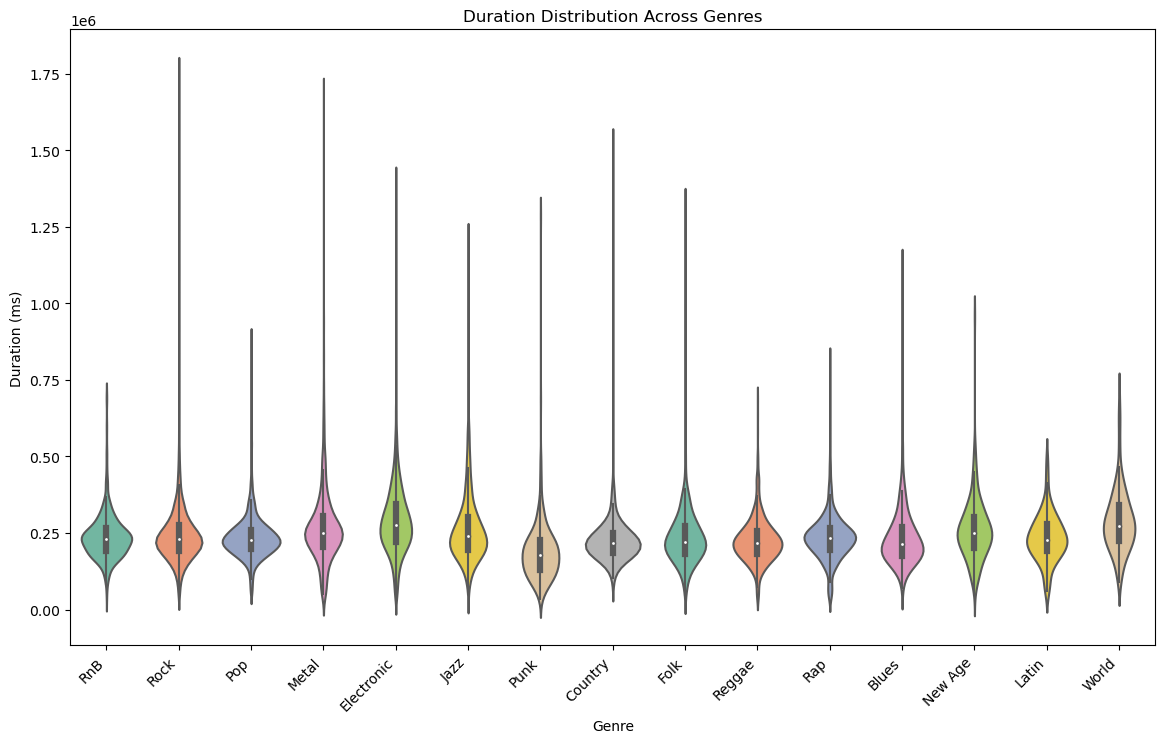

In [13]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(14, 8))
sns.violinplot(x='genre', y='duration_ms', data=df, palette='Set2')
plt.title('Duration Distribution Across Genres')
plt.xlabel('Genre')
plt.ylabel('Duration (ms)')
plt.xticks(rotation=45, ha='right')
plt.show()


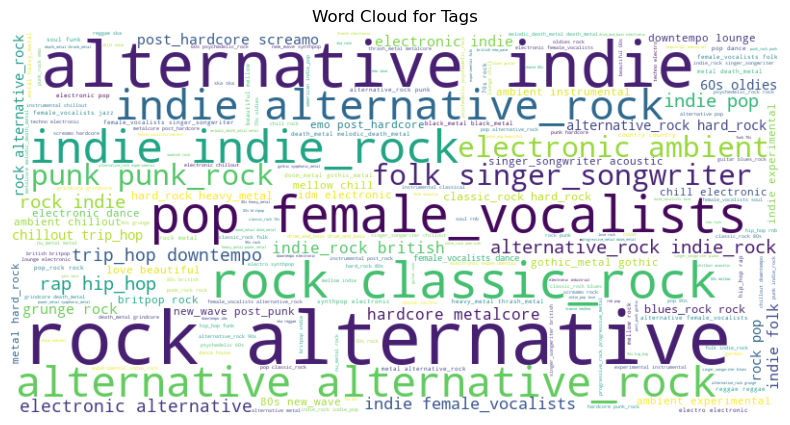

In [14]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Concatenate all tags into a single string
all_tags = ' '.join(df['tags'].dropna())

# Generate the word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white', random_state=42).generate(all_tags)

# Display the generated word cloud using matplotlib
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud for Tags')
plt.show()


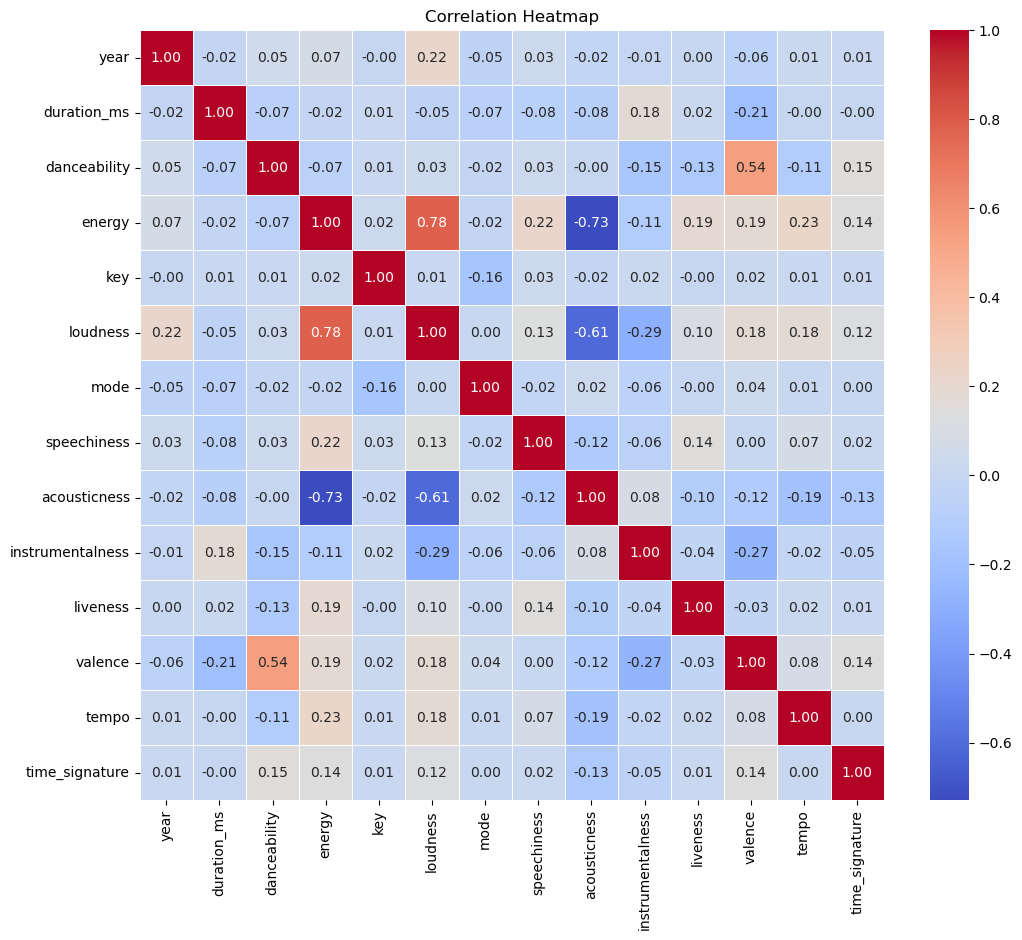

In [15]:
import seaborn as sns
import matplotlib.pyplot as plt

# Calculate the correlation matrix
correlation_matrix = df.corr()

# Create a heatmap using Seaborn
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Heatmap')
plt.show()


#### 1. Valence and Danceability (Correlation: 0.54):
A positive correlation of 0.54 suggests a moderate positive linear relationship between valence and danceability.
As valence increases, danceability tends to increase as well, and vice versa.
#### 2. Loudness and Energy (Correlation: 0.78):
A strong positive correlation of 0.78 indicates a robust positive linear relationship between loudness and energy.
Higher loudness levels are associated with higher energy in the music.
#### 3. Acousticness and Energy (Correlation: -0.73):
A strong negative correlation of -0.73 implies a robust negative linear relationship between acousticness and energy.
As the level of acousticness decreases (more electronic or non-acoustic), energy tends to increase.
#### 4. Acousticness and Loudness (Correlation: -0.61):
A strong negative correlation of -0.61 suggests a robust negative linear relationship between acousticness and loudness.
Less acoustic (more electronic) tracks tend to have higher loudness levels, and vice versa.

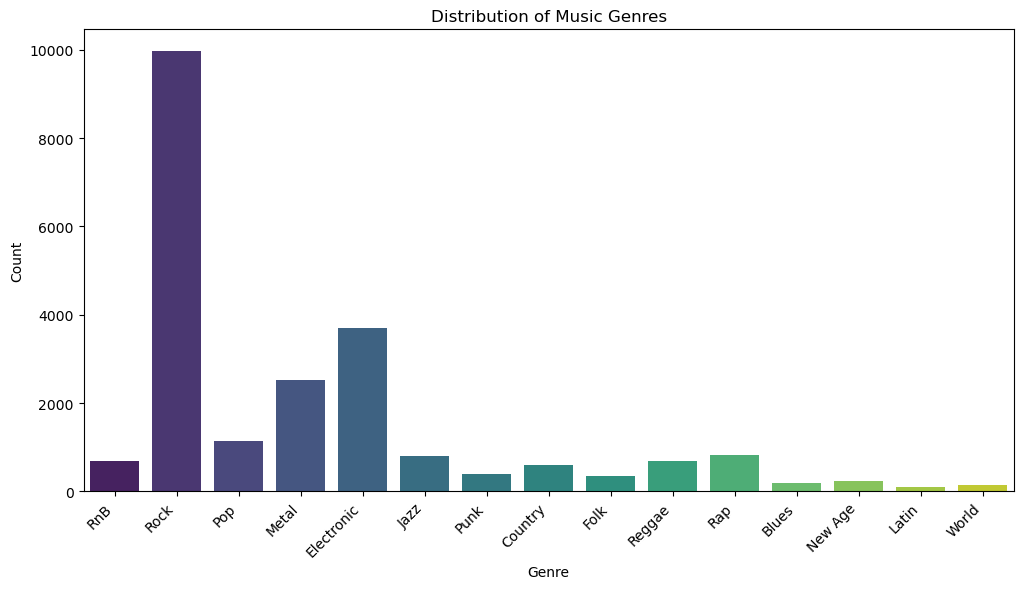

In [16]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming 'genre' is the column containing genre information in your DataFrame
plt.figure(figsize=(12, 6))
sns.countplot(x='genre', data=df, palette='viridis')
plt.title('Distribution of Music Genres')
plt.xlabel('Genre')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.show()


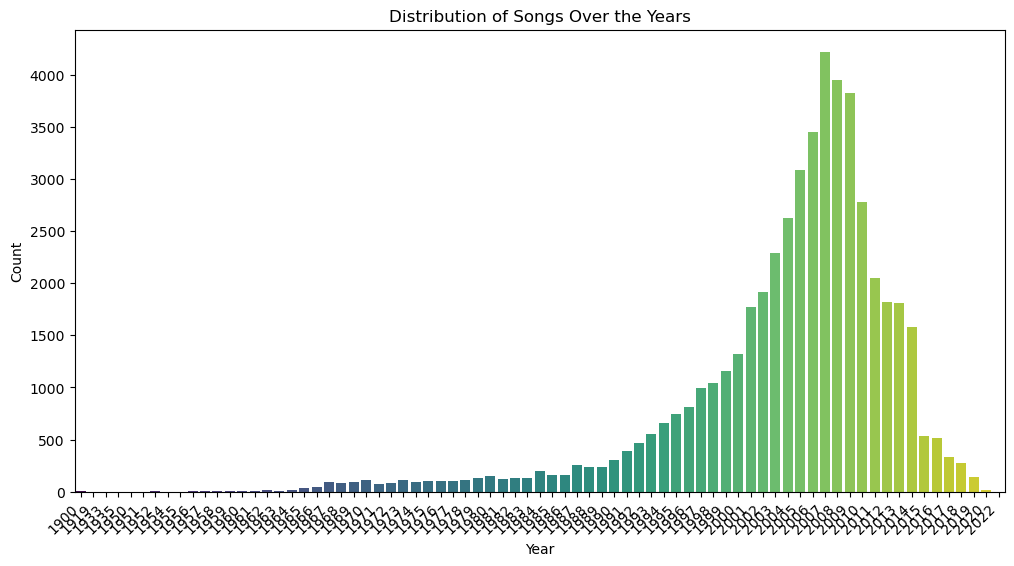

In [17]:
plt.figure(figsize=(12, 6))
sns.countplot(x='year', data=df, palette='viridis')
plt.title('Distribution of Songs Over the Years')
plt.xlabel('Year')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.show()


C:\Users\Ken\AppData\Local\Temp\ipykernel_12152\2458810390.py:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(x='year', y='danceability', data=df, ci=None)


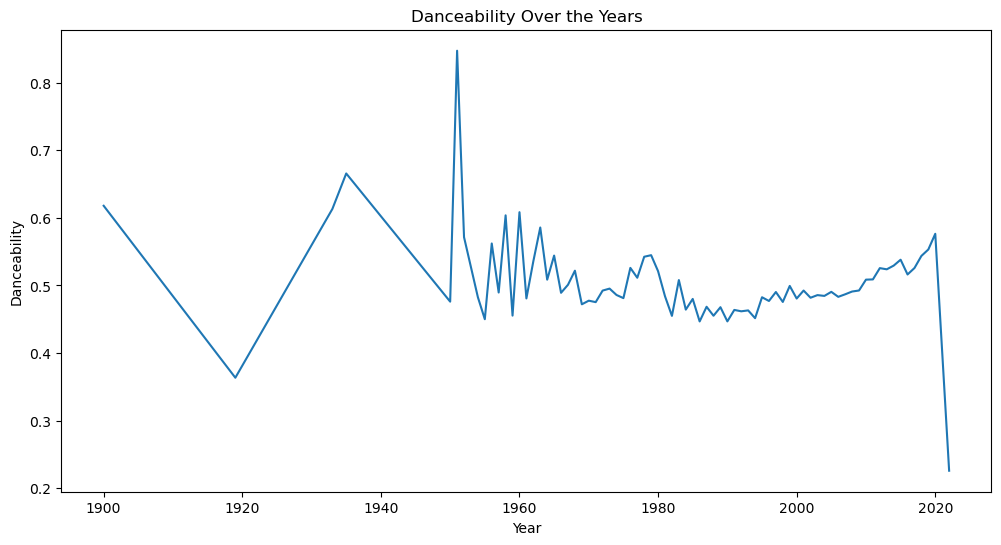

In [18]:
plt.figure(figsize=(12, 6))
sns.lineplot(x='year', y='danceability', data=df, ci=None)
plt.title('Danceability Over the Years')
plt.xlabel('Year')
plt.ylabel('Danceability')
plt.show()


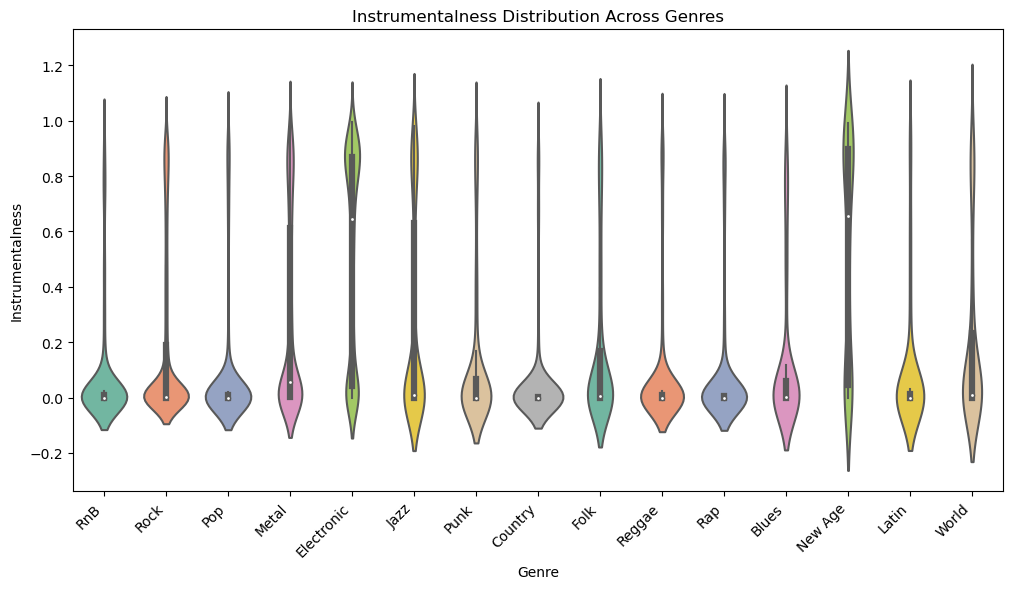

In [19]:
plt.figure(figsize=(12, 6))
sns.violinplot(x='genre', y='instrumentalness', data=df, palette='Set2')
plt.title('Instrumentalness Distribution Across Genres')
plt.xlabel('Genre')
plt.ylabel('Instrumentalness')
plt.xticks(rotation=45, ha='right')
plt.show()


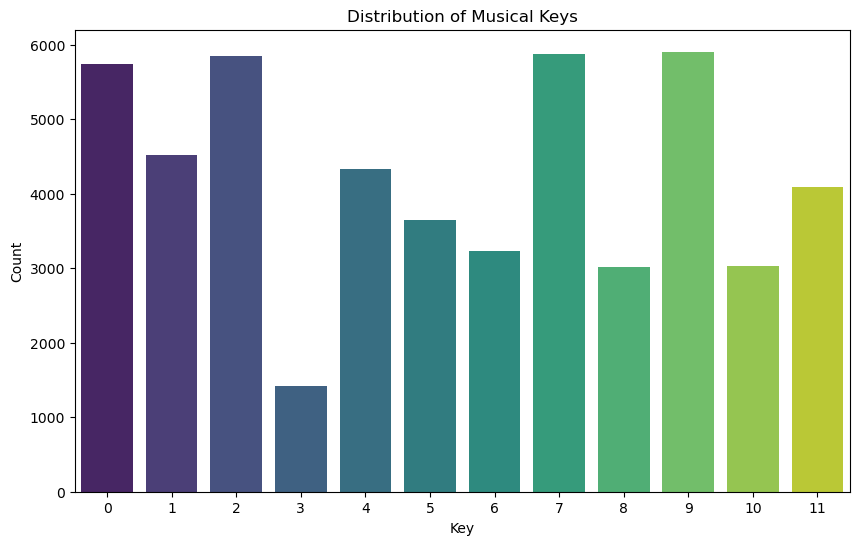

In [20]:
plt.figure(figsize=(10, 6))
sns.countplot(x='key', data=df, palette='viridis')
plt.title('Distribution of Musical Keys')
plt.xlabel('Key')
plt.ylabel('Count')
plt.show()


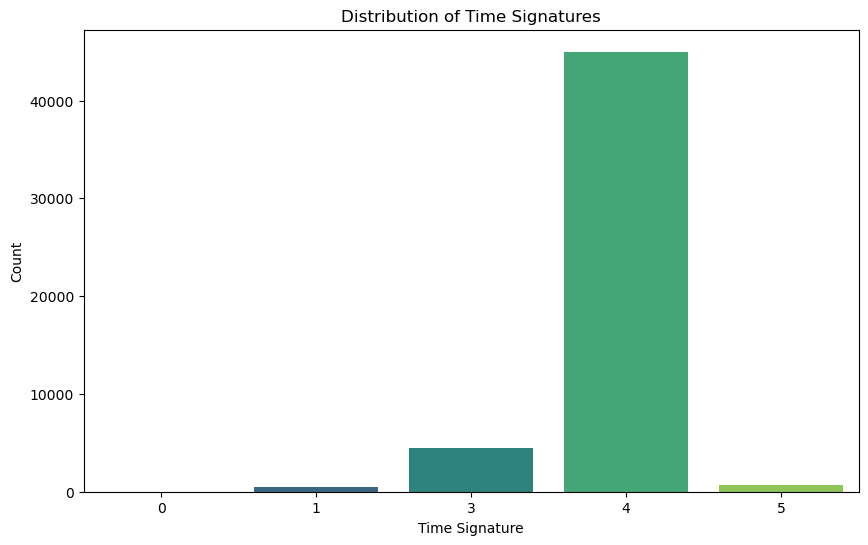

In [21]:
plt.figure(figsize=(10, 6))
sns.countplot(x='time_signature', data=df, palette='viridis')
plt.title('Distribution of Time Signatures')
plt.xlabel('Time Signature')
plt.ylabel('Count')
plt.show()


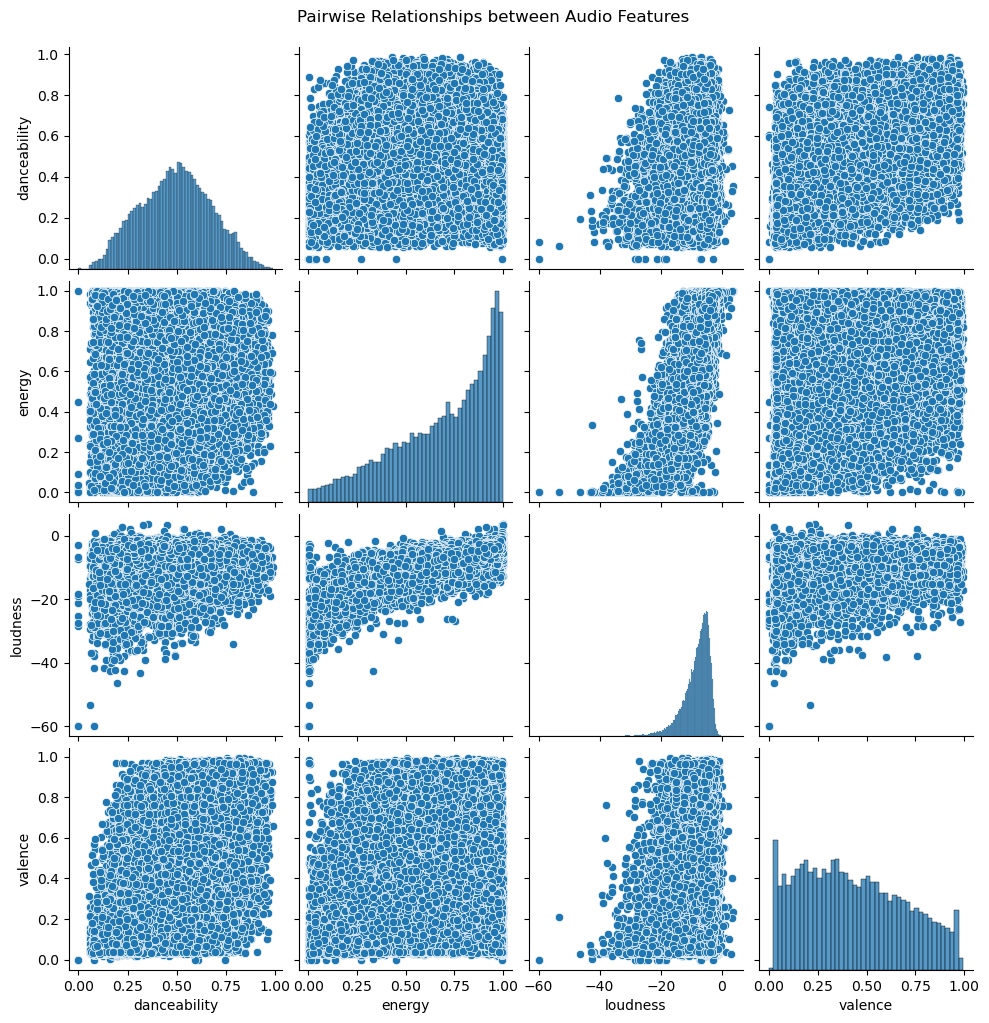

In [22]:
sns.pairplot(df[['danceability', 'energy', 'loudness', 'valence']])
plt.suptitle('Pairwise Relationships between Audio Features', y=1.02)
plt.show()


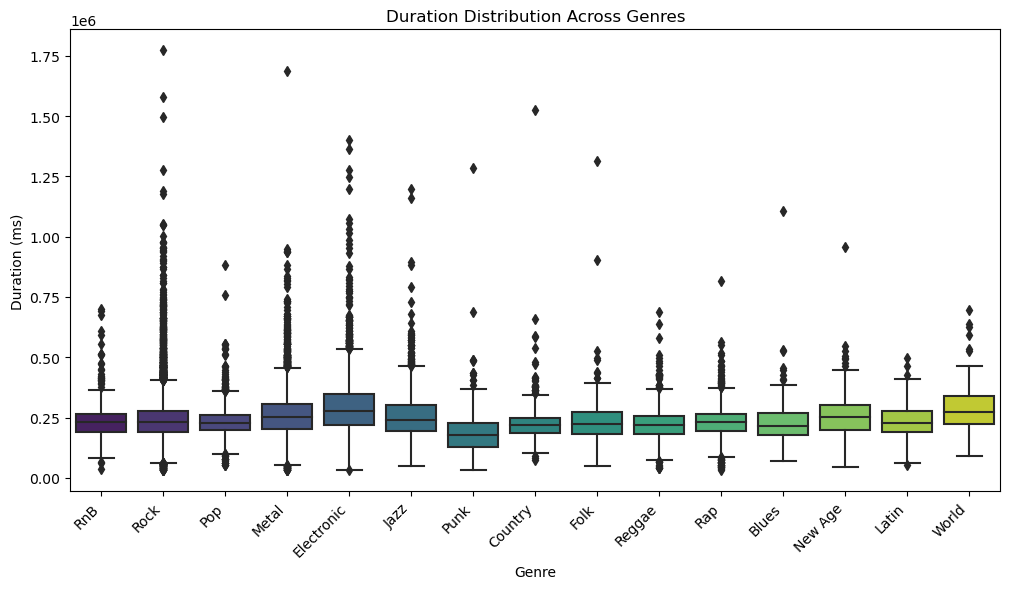

In [23]:
plt.figure(figsize=(12, 6))
sns.boxplot(x='genre', y='duration_ms', data=df, palette='viridis')
plt.title('Duration Distribution Across Genres')
plt.xlabel('Genre')
plt.ylabel('Duration (ms)')
plt.xticks(rotation=45, ha='right')
plt.show()


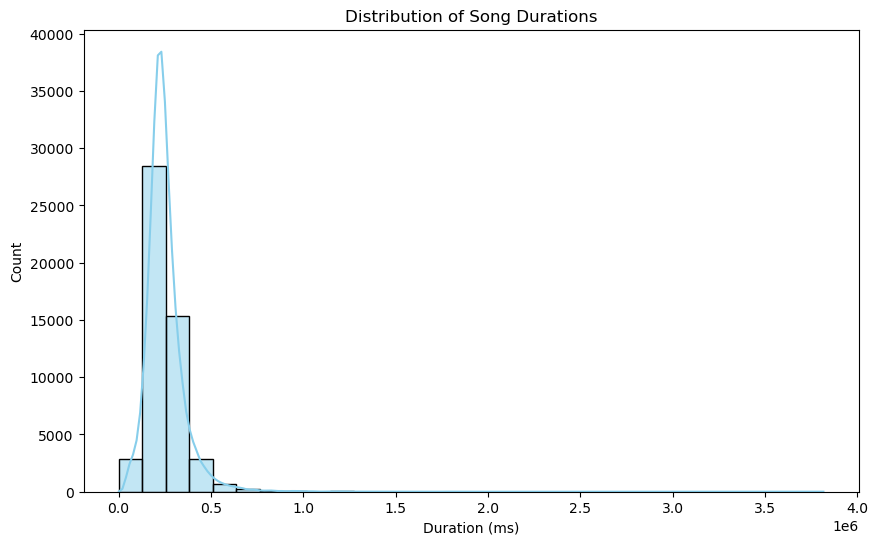

In [24]:
plt.figure(figsize=(10, 6))
sns.histplot(df['duration_ms'], bins=30, kde=True, color='skyblue')
plt.title('Distribution of Song Durations')
plt.xlabel('Duration (ms)')
plt.ylabel('Count')
plt.show()


In [25]:
import dash
import dash_core_components as dcc
import dash_html_components as html
from dash.dependencies import Input, Output
import plotly.express as px

# Create a Dash web application
app = dash.Dash(__name__)

# Define the layout of the dashboard
app.layout = html.Div([
    html.H1("Music Analysis Dashboard"),
    
    # Dropdown for selecting features
    html.Label("Select Feature:"),
    dcc.Dropdown(
        id='feature-dropdown',
        options=[
            {'label': 'year', 'value': 'year'},
            {'label': 'Danceability', 'value': 'danceability'},
            {'label': 'Energy', 'value': 'energy'},
            {'label': 'Valence', 'value': 'valence'},
            {'label': 'duration_ms', 'value': 'duration_ms'},
            {'label': 'key', 'value': 'key'},
            {'label': 'loudness', 'value': 'loudness'},
            {'label': 'speechiness', 'value': 'speechiness'},
            {'label': 'acousticness', 'value': 'acousticness'},
            {'label': 'instrumentalness', 'value': 'instrumentalness'},
            {'label': 'liveness', 'value': 'liveness'},
            {'label': 'valence', 'value': 'valence'},
            {'label': 'tempo', 'value': 'tempo'},
            {'label': 'time_signature', 'value': 'time_signature'},
            # Add more features as needed
        ],
        value='danceability'  # Default feature
    ),
    
    # Graph to display feature distribution
    dcc.Graph(id='feature-distribution'),

    # Add more components as needed
])

# Define callback to update graph based on feature selection
@app.callback(
    Output('feature-distribution', 'figure'),
    [Input('feature-dropdown', 'value')]
)
def update_graph(selected_feature):
    # Create a distribution plot based on the selected feature
    fig = px.histogram(df, x=selected_feature, title=f'Distribution of {selected_feature.capitalize()}')
    return fig

# Run the application
if __name__ == '__main__':
    app.run_server(debug=True)

   

C:\Users\Ken\AppData\Local\Temp\ipykernel_12152\2721233488.py:2: UserWarning: 
The dash_core_components package is deprecated. Please replace
`import dash_core_components as dcc` with `from dash import dcc`
  import dash_core_components as dcc
C:\Users\Ken\AppData\Local\Temp\ipykernel_12152\2721233488.py:3: UserWarning: 
The dash_html_components package is deprecated. Please replace
`import dash_html_components as html` with `from dash import html`
  import dash_html_components as html




### Now lets use the user data to create additional features

In [26]:
df1.head()


,track_id,user_id,playcount
0,TRIRLYL128F42539D1,b80344d063b5ccb3212f76538f3d9e43d87dca9e,1
1,TRFUPBA128F934F7E1,b80344d063b5ccb3212f76538f3d9e43d87dca9e,1
2,TRLQPQJ128F42AA94F,b80344d063b5ccb3212f76538f3d9e43d87dca9e,1
3,TRTUCUY128F92E1D24,b80344d063b5ccb3212f76538f3d9e43d87dca9e,1
4,TRHDDQG12903CB53EE,b80344d063b5ccb3212f76538f3d9e43d87dca9e,1


In [27]:
df1.tail()

,track_id,user_id,playcount
9711296,TRBKFKL128E078ED76,b7815dbb206eb2831ce0fe040d0aa537e2e800f7,1
9711297,TRYFXPG128E078ECBD,b7815dbb206eb2831ce0fe040d0aa537e2e800f7,1
9711298,TROBUUZ128F4263002,b7815dbb206eb2831ce0fe040d0aa537e2e800f7,1
9711299,TROEWXC128F148C83E,b7815dbb206eb2831ce0fe040d0aa537e2e800f7,1
9711300,TROHQNO128F146ECCB,b7815dbb206eb2831ce0fe040d0aa537e2e800f7,1


In [28]:
import pandas as pd

# Assuming df1 is the subset dataset and df is the other dataset
# with columns track_id, name, artist, and other features

# Generate track-level features
track_playcount = df1.groupby('track_id')['playcount'].agg(['sum', 'mean', 'max', 'min']).reset_index()
track_playcount.columns = ['track_id', 'total_playcount_track', 'average_playcount_track', 'max_playcount_track', 'min_playcount_track']

# Merge track-level features with the other dataset based on track_id
df_merged = pd.merge(df, track_playcount, on='track_id', how='left')

# Now df_merged contains the original dataset with additional playcount features


In [29]:
df_merged.head()

,track_id,name,artist,spotify_preview_url,spotify_id,tags,genre,year,duration_ms,danceability,...,acousticness,instrumentalness,liveness,valence,tempo,time_signature,total_playcount_track,average_playcount_track,max_playcount_track,min_playcount_track
0,TRIOREW128F424EAF0,Mr. Brightside,The Killers,https://p.scdn.co/mp3-preview/4d26180e6961fd46...,09ZQ5TmUG8TSL56n0knqrj,"rock, alternative, indie, alternative_rock, in...",NaN,2004,222200,0.355,...,0.001190,0.000000,0.0971,0.240,148.114,4,162.0,3.951220,52.0,1.0
1,TRRIVDJ128F429B0E8,Wonderwall,Oasis,https://p.scdn.co/mp3-preview/d012e536916c927b...,06UfBBDISthj1ZJAtX4xjj,"rock, alternative, indie, pop, alternative_roc...",NaN,2006,258613,0.409,...,0.000807,0.000000,0.2070,0.651,174.426,4,995.0,2.632275,27.0,1.0
2,TROUVHL128F426C441,Come as You Are,Nirvana,https://p.scdn.co/mp3-preview/a1c11bb1cb231031...,0keNu0t0tqsWtExGM3nT1D,"rock, alternative, alternative_rock, 90s, grunge",RnB,1991,218920,0.508,...,0.000175,0.000459,0.0878,0.543,120.012,4,NaN,NaN,NaN,NaN
3,TRUEIND128F93038C4,Take Me Out,Franz Ferdinand,https://p.scdn.co/mp3-preview/399c401370438be4...,0ancVQ9wEcHVd0RrGICTE4,"rock, alternative, indie, alternative_rock, in...",NaN,2004,237026,0.279,...,0.000389,0.000655,0.1330,0.490,104.560,4,21.0,1.050000,2.0,1.0
4,TRLNZBD128F935E4D8,Creep,Radiohead,https://p.scdn.co/mp3-preview/e7eb60e9466bc3a2...,01QoK9DA7VTeTSE3MNzp4I,"rock, alternative, indie, alternative_rock, in...",RnB,2008,238640,0.515,...,0.010200,0.000141,0.1290,0.104,91.841,4,NaN,NaN,NaN,NaN


In [30]:
print("\nMissing Values:")
print(df_merged.isnull().sum())


Missing Values:
track_id                       0
name                           0
artist                         0
spotify_preview_url            0
spotify_id                     0
tags                        1127
genre                      28335
year                           0
duration_ms                    0
danceability                   0
energy                         0
key                            0
loudness                       0
mode                           0
speechiness                    0
acousticness                   0
instrumentalness               0
liveness                       0
valence                        0
tempo                          0
time_signature                 0
total_playcount_track      20224
average_playcount_track    20224
max_playcount_track        20224
min_playcount_track        20224
dtype: int64


In [31]:
df_merged1 = df_merged.dropna().reset_index(drop=True)


In [32]:
print("\nMissing Values:")
print(df_merged1.isnull().sum())


Missing Values:
track_id                   0
name                       0
artist                     0
spotify_preview_url        0
spotify_id                 0
tags                       0
genre                      0
year                       0
duration_ms                0
danceability               0
energy                     0
key                        0
loudness                   0
mode                       0
speechiness                0
acousticness               0
instrumentalness           0
liveness                   0
valence                    0
tempo                      0
time_signature             0
total_playcount_track      0
average_playcount_track    0
max_playcount_track        0
min_playcount_track        0
dtype: int64


In [33]:
print("\nUnique Values:")
print(df_merged1.nunique())


Unique Values:
track_id                   16119
name                       16119
artist                      4144
spotify_preview_url        16116
spotify_id                 16119
tags                        8351
genre                         15
year                          64
duration_ms                11632
danceability                 925
energy                      1136
key                           12
loudness                    9286
mode                           2
speechiness                 1176
acousticness                4340
instrumentalness            4174
liveness                    1530
valence                     1498
tempo                      14070
time_signature                 5
total_playcount_track       3294
average_playcount_track     9720
max_playcount_track          352
min_playcount_track           16
dtype: int64


In [34]:
# Assuming df is your original DataFrame with features and df_merged contains the standardized and scaled playcount features

# Merge the standardized and scaled playcount features with the original DataFrame based on a common column (e.g., 'track_id' or 'user_id')
df_final = pd.merge(df, df_merged[['track_id', 'total_playcount_track', 'average_playcount_track', 'max_playcount_track', 'min_playcount_track']], on='track_id', how='left')

# Now df_final contains the original features along with the standardized and scaled playcount features


In [35]:
# Assuming df is your original DataFrame with features and df_merged contains the standardized and scaled playcount features

# Merge the standardized and scaled playcount features with the original DataFrame based on a common column (e.g., 'track_id' or 'user_id')
df_final = pd.merge(df, df_merged[['track_id', 'total_playcount_track', 'average_playcount_track', 'max_playcount_track', 'min_playcount_track']], on='track_id', how='left')

# Now df_final contains the original features along with the standardized and scaled playcount features


In [36]:
df_final.head()

,track_id,name,artist,spotify_preview_url,spotify_id,tags,genre,year,duration_ms,danceability,...,acousticness,instrumentalness,liveness,valence,tempo,time_signature,total_playcount_track,average_playcount_track,max_playcount_track,min_playcount_track
0,TRIOREW128F424EAF0,Mr. Brightside,The Killers,https://p.scdn.co/mp3-preview/4d26180e6961fd46...,09ZQ5TmUG8TSL56n0knqrj,"rock, alternative, indie, alternative_rock, in...",NaN,2004,222200,0.355,...,0.001190,0.000000,0.0971,0.240,148.114,4,162.0,3.951220,52.0,1.0
1,TRRIVDJ128F429B0E8,Wonderwall,Oasis,https://p.scdn.co/mp3-preview/d012e536916c927b...,06UfBBDISthj1ZJAtX4xjj,"rock, alternative, indie, pop, alternative_roc...",NaN,2006,258613,0.409,...,0.000807,0.000000,0.2070,0.651,174.426,4,995.0,2.632275,27.0,1.0
2,TROUVHL128F426C441,Come as You Are,Nirvana,https://p.scdn.co/mp3-preview/a1c11bb1cb231031...,0keNu0t0tqsWtExGM3nT1D,"rock, alternative, alternative_rock, 90s, grunge",RnB,1991,218920,0.508,...,0.000175,0.000459,0.0878,0.543,120.012,4,NaN,NaN,NaN,NaN
3,TRUEIND128F93038C4,Take Me Out,Franz Ferdinand,https://p.scdn.co/mp3-preview/399c401370438be4...,0ancVQ9wEcHVd0RrGICTE4,"rock, alternative, indie, alternative_rock, in...",NaN,2004,237026,0.279,...,0.000389,0.000655,0.1330,0.490,104.560,4,21.0,1.050000,2.0,1.0
4,TRLNZBD128F935E4D8,Creep,Radiohead,https://p.scdn.co/mp3-preview/e7eb60e9466bc3a2...,01QoK9DA7VTeTSE3MNzp4I,"rock, alternative, indie, alternative_rock, in...",RnB,2008,238640,0.515,...,0.010200,0.000141,0.1290,0.104,91.841,4,NaN,NaN,NaN,NaN


In [37]:
print("\nMissing Values:")
print(df_final.isnull().sum())


Missing Values:
track_id                       0
name                           0
artist                         0
spotify_preview_url            0
spotify_id                     0
tags                        1127
genre                      28335
year                           0
duration_ms                    0
danceability                   0
energy                         0
key                            0
loudness                       0
mode                           0
speechiness                    0
acousticness                   0
instrumentalness               0
liveness                       0
valence                        0
tempo                          0
time_signature                 0
total_playcount_track      20224
average_playcount_track    20224
max_playcount_track        20224
min_playcount_track        20224
dtype: int64


In [38]:
df_final=df_final.dropna().reset_index(drop=True)

In [39]:
df_final

,track_id,name,artist,spotify_preview_url,spotify_id,tags,genre,year,duration_ms,danceability,...,acousticness,instrumentalness,liveness,valence,tempo,time_signature,total_playcount_track,average_playcount_track,max_playcount_track,min_playcount_track
0,TRIODZU128E078F3E2,Under the Bridge,Red Hot Chili Peppers,https://p.scdn.co/mp3-preview/90e41778392f27b6...,06zh28PcYIFvNOAz5Wq2Xb,"rock, alternative, alternative_rock, 90s, funk",Pop,2003,265506,0.554,...,0.016800,0.000534,0.1360,0.513,84.275,4,990.0,2.519084,41.0,1.0
1,TRYEZGE128F92D04C8,Feel Good Inc.,Gorillaz,https://p.scdn.co/mp3-preview/7388c425022ced92...,09xrHi86kLkEIzDLZiHNnv,"rock, electronic, alternative, indie, pop, alt...",RnB,2010,223106,0.809,...,0.033700,0.001410,0.8260,0.832,138.556,4,98.0,2.333333,8.0,1.0
2,TRIQWYH128F1486062,Paranoid Android,Radiohead,https://p.scdn.co/mp3-preview/d68bd7fa4f0bd86e...,0bomiLGPTUNyk3mV19pbwN,"rock, electronic, alternative, indie, alternat...",Jazz,2012,384933,0.232,...,0.052300,0.006060,0.1180,0.299,81.849,4,1075.0,2.239583,22.0,1.0
3,TRUOEWJ128F9345A85,Stairway to Heaven,Led Zeppelin,https://p.scdn.co/mp3-preview/6879ce58805099f6...,03hLW9osM6UuNqlpwL8XPo,"rock, classic_rock, hard_rock, progressive_roc...",Punk,2013,488019,0.354,...,0.625000,0.011200,0.3500,0.212,80.360,4,566.0,1.938356,38.0,1.0
4,TRNNGMK128F423F034,Where Is My Mind?,Pixies,https://p.scdn.co/mp3-preview/d4a375a9c19d4ea8...,0DJU6KGwdkxEPCy3BZ3UZY,"rock, alternative, indie, alternative_rock, in...",Rock,2005,230093,0.514,...,0.007800,0.000859,0.0802,0.212,82.104,4,32185.0,3.257261,236.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16114,TRIMGHU128F93443E8,My Sweet Dog,Hi-Standard,https://p.scdn.co/mp3-preview/4e6746eb6cfb8e16...,1QI6h4zJmmEk3Dl0nM31q7,"punk, punk_rock",Punk,1997,95293,0.640,...,0.003550,0.153000,0.0676,0.768,119.388,4,58.0,2.230769,10.0,1.0
16115,TRPJBMG128F92D164E,Stretch My Arms,Fact,https://p.scdn.co/mp3-preview/d4f92d8d34185280...,1QsJi0afbAvbnZHO8AtOLD,"metal, metalcore, japanese",Metal,2009,241933,0.362,...,0.002130,0.005370,0.1830,0.442,172.951,4,83.0,3.074074,24.0,1.0
16116,TRTBIEH128F427C13C,Let It All Come Down,Boom Boom Satellites,https://p.scdn.co/mp3-preview/5d8e0600d03bf0e4...,47tFsBHLZ1ETuunLZKtgAN,"electronic, japanese",Rock,1998,282093,0.570,...,0.028600,0.000708,0.1640,0.118,103.008,4,56.0,3.294118,12.0,1.0
16117,TRNIBCG128F92E4555,Keyword,9mm Parabellum Bullet,https://p.scdn.co/mp3-preview/1cb3b1abdab3baf6...,5lQatPubYHgBIK22beDTi4,"rock, japanese",Rock,2008,203226,0.279,...,0.000811,0.000041,0.0477,0.256,192.071,4,12.0,2.000000,5.0,1.0


In [40]:
print("\nMissing Values:")
print(df_final.isnull().sum())


Missing Values:
track_id                   0
name                       0
artist                     0
spotify_preview_url        0
spotify_id                 0
tags                       0
genre                      0
year                       0
duration_ms                0
danceability               0
energy                     0
key                        0
loudness                   0
mode                       0
speechiness                0
acousticness               0
instrumentalness           0
liveness                   0
valence                    0
tempo                      0
time_signature             0
total_playcount_track      0
average_playcount_track    0
max_playcount_track        0
min_playcount_track        0
dtype: int64


In [41]:
df_final.shape

(16119, 25)

In [42]:
df_final.head()

,track_id,name,artist,spotify_preview_url,spotify_id,tags,genre,year,duration_ms,danceability,...,acousticness,instrumentalness,liveness,valence,tempo,time_signature,total_playcount_track,average_playcount_track,max_playcount_track,min_playcount_track
0,TRIODZU128E078F3E2,Under the Bridge,Red Hot Chili Peppers,https://p.scdn.co/mp3-preview/90e41778392f27b6...,06zh28PcYIFvNOAz5Wq2Xb,"rock, alternative, alternative_rock, 90s, funk",Pop,2003,265506,0.554,...,0.0168,0.000534,0.1360,0.513,84.275,4,990.0,2.519084,41.0,1.0
1,TRYEZGE128F92D04C8,Feel Good Inc.,Gorillaz,https://p.scdn.co/mp3-preview/7388c425022ced92...,09xrHi86kLkEIzDLZiHNnv,"rock, electronic, alternative, indie, pop, alt...",RnB,2010,223106,0.809,...,0.0337,0.001410,0.8260,0.832,138.556,4,98.0,2.333333,8.0,1.0
2,TRIQWYH128F1486062,Paranoid Android,Radiohead,https://p.scdn.co/mp3-preview/d68bd7fa4f0bd86e...,0bomiLGPTUNyk3mV19pbwN,"rock, electronic, alternative, indie, alternat...",Jazz,2012,384933,0.232,...,0.0523,0.006060,0.1180,0.299,81.849,4,1075.0,2.239583,22.0,1.0
3,TRUOEWJ128F9345A85,Stairway to Heaven,Led Zeppelin,https://p.scdn.co/mp3-preview/6879ce58805099f6...,03hLW9osM6UuNqlpwL8XPo,"rock, classic_rock, hard_rock, progressive_roc...",Punk,2013,488019,0.354,...,0.6250,0.011200,0.3500,0.212,80.360,4,566.0,1.938356,38.0,1.0
4,TRNNGMK128F423F034,Where Is My Mind?,Pixies,https://p.scdn.co/mp3-preview/d4a375a9c19d4ea8...,0DJU6KGwdkxEPCy3BZ3UZY,"rock, alternative, indie, alternative_rock, in...",Rock,2005,230093,0.514,...,0.0078,0.000859,0.0802,0.212,82.104,4,32185.0,3.257261,236.0,1.0


In [43]:
df_final['text_features'] = df_final['name'] + ' ' + df_final['artist'] + ' ' + df_final['tags'] + ' ' + df_final['genre']

In [44]:
df_final['text_features'].head()

0    Under the Bridge Red Hot Chili Peppers rock, a...
1    Feel Good Inc. Gorillaz rock, electronic, alte...
2    Paranoid Android Radiohead rock, electronic, a...
3    Stairway to Heaven Led Zeppelin rock, classic_...
4    Where Is My Mind? Pixies rock, alternative, in...
Name: text_features, dtype: object

In [45]:
df_final['text_features']=df_final['text_features'].str.lower().replace(r'^\w\s','').replace(r'\n','', regex=True)
audio_features = df_final[['danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness',
                     'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo', 'time_signature']]

In [46]:
df_final['text_features']

0        under the bridge red hot chili peppers rock, a...
1        feel good inc. gorillaz rock, electronic, alte...
2        paranoid android radiohead rock, electronic, a...
3        stairway to heaven led zeppelin rock, classic_...
4        where is my mind? pixies rock, alternative, in...
                               ...                        
16114        my sweet dog hi-standard punk, punk_rock punk
16115    stretch my arms fact metal, metalcore, japanes...
16116    let it all come down boom boom satellites elec...
16117    keyword 9mm parabellum bullet rock, japanese rock
16118    slip of the lip fact alternative_rock, punk_ro...
Name: text_features, Length: 16119, dtype: object

In [47]:
df_final['text_features'].shape

(16119,)

In [48]:
audio_features

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature
0,0.554,0.490,4,-8.046,1,0.0457,0.016800,0.000534,0.1360,0.513,84.275,4
1,0.809,0.720,6,-7.776,1,0.1360,0.033700,0.001410,0.8260,0.832,138.556,4
2,0.232,0.800,5,-6.863,1,0.0573,0.052300,0.006060,0.1180,0.299,81.849,4
3,0.354,0.361,9,-12.722,0,0.0509,0.625000,0.011200,0.3500,0.212,80.360,4
4,0.514,0.435,4,-13.517,1,0.0353,0.007800,0.000859,0.0802,0.212,82.104,4
...,...,...,...,...,...,...,...,...,...,...,...,...
16114,0.640,0.819,7,-7.160,1,0.0548,0.003550,0.153000,0.0676,0.768,119.388,4
16115,0.362,0.951,10,-4.621,1,0.1170,0.002130,0.005370,0.1830,0.442,172.951,4
16116,0.570,0.926,1,-5.766,0,0.0672,0.028600,0.000708,0.1640,0.118,103.008,4
16117,0.279,0.974,8,-3.481,1,0.1260,0.000811,0.000041,0.0477,0.256,192.071,4


In [49]:
df_final["text_features"].head(20)

0     under the bridge red hot chili peppers rock, a...
1     feel good inc. gorillaz rock, electronic, alte...
2     paranoid android radiohead rock, electronic, a...
3     stairway to heaven led zeppelin rock, classic_...
4     where is my mind? pixies rock, alternative, in...
5     heart-shaped box nirvana rock, alternative, al...
6     in bloom nirvana rock, alternative, alternativ...
7     float on modest mouse rock, alternative, indie...
8     can't stop red hot chili peppers rock, alterna...
9     naïve the kooks rock, alternative, indie, indi...
10    in my place coldplay rock, alternative, indie,...
11    mardy bum arctic monkeys rock, alternative, in...
12    sweet home alabama lynyrd skynyrd rock, classi...
13    speed of sound coldplay rock, alternative, ind...
14    sultans of swing dire straits rock, classic_ro...
15    last nite the strokes rock, alternative, indie...
16    don't stop me now queen rock, classic_rock, 80...
17    fluorescent adolescent arctic monkeys rock

In [207]:
df_sample=df_final.sample(5000).reset_index(drop=True)

In [208]:
df_sample.shape

(5000, 26)

In [209]:
df_sample

,track_id,name,artist,spotify_preview_url,spotify_id,tags,genre,year,duration_ms,danceability,...,instrumentalness,liveness,valence,tempo,time_signature,total_playcount_track,average_playcount_track,max_playcount_track,min_playcount_track,text_features
0,TRYFTMN128F427E2A1,Navajo,Black Lips,https://p.scdn.co/mp3-preview/67f201267b840c9f...,3ZyjXmhyg3r7wtz4rcHayS,"rock, alternative_rock, psychedelic, country, ...",Rock,2007,161026,0.607,...,0.000002,0.1250,0.4680,105.589,4,889.0,2.924342,28.0,1.0,"navajo black lips rock, alternative_rock, psyc..."
1,TRUXWBF128E0785B09,Cheers Darlin',Damien Rice,https://p.scdn.co/mp3-preview/19e8d7b3875de8bc...,44zGAo63hhc3xo0rlBweRo,"alternative, indie, folk, indie_rock, singer_s...",Folk,2003,350226,0.549,...,0.000507,0.1650,0.1030,113.552,3,5274.0,2.765600,92.0,1.0,"cheers darlin' damien rice alternative, indie,..."
2,TRQIMNM128F933376E,Speak in Tongues,Placebo,https://p.scdn.co/mp3-preview/8ff3dc53f4913f8b...,0Hh5QbBZJVZhgFXoLxBcYB,"alternative, alternative_rock, british",Rock,2009,246026,0.654,...,0.068800,0.1050,0.0784,140.273,4,571.0,2.130597,18.0,1.0,"speak in tongues placebo alternative, alternat..."
3,TRTRXCY128E07816DE,Song of Joy,Nick Cave & The Bad Seeds,https://p.scdn.co/mp3-preview/1af9c1b6d389651e...,1pjM5AWnBkMRUv8yEBVMrJ,"rock, alternative, alternative_rock, experimen...",Rock,1996,407293,0.401,...,0.000747,0.1070,0.0900,82.136,4,595.0,1.776119,25.0,1.0,"song of joy nick cave & the bad seeds rock, al..."
4,TRJOFKB128F429594A,Nesso,Vladislav Delay,https://p.scdn.co/mp3-preview/97770968686d3d96...,2WOLkweNzJ7XsSo2GLub7c,ambient,Electronic,2007,191773,0.292,...,0.492000,0.1930,0.3490,137.065,4,39.0,2.294118,5.0,1.0,nesso vladislav delay ambient electronic
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,TRFTIBW128F1479218,Little Bit of Rain,Karen Dalton,https://p.scdn.co/mp3-preview/44ac22bc2a5550c1...,09g4TuWLxMmrOTt1kzS47Z,"folk, blues, country",Folk,1969,156893,0.432,...,0.074900,0.1010,0.3610,173.944,3,177.0,1.988764,15.0,1.0,"little bit of rain karen dalton folk, blues, c..."
4996,TRLJZVN128EF3435F5,Another Girl Another Planet,blink-182,https://p.scdn.co/mp3-preview/2efdf946fb435b2d...,08OhnqyOQq4Gn2nC744T71,"punk, punk_rock, cover",Rock,2005,161066,0.434,...,0.000007,0.0775,0.8000,176.104,4,2327.0,2.510248,56.0,1.0,"another girl another planet blink-182 punk, pu..."
4997,TRXEAII128F93091A7,Silver,Bonobo,https://p.scdn.co/mp3-preview/61f6b8632bd5e529...,0GPDLs03g7VIvPZHzgX3Jk,"electronic, instrumental, chillout, trip_hop, ...",Rock,2000,393533,0.428,...,0.883000,0.1050,0.3040,111.034,4,46.0,1.642857,5.0,1.0,"silver bonobo electronic, instrumental, chillo..."
4998,TRCPGTX128F424CDF5,Penthouse Pauper,Creedence Clearwater Revival,https://p.scdn.co/mp3-preview/592bf35c2a5f791f...,0YGKP5BwLRZxLyLfe204FT,"classic_rock, blues, 60s, blues_rock",Rock,2011,217960,0.483,...,0.003700,0.0663,0.8580,92.956,4,603.0,1.496278,12.0,1.0,penthouse pauper creedence clearwater revival ...


In [210]:
import nltk
from nltk.stem.porter import PorterStemmer

In [211]:
stemmer=PorterStemmer()


In [212]:
def token(txt):
    token=nltk.word_tokenize(txt)
    a=[stemmer.stem(w) for w in token]
    return " ".join(a)

In [213]:
token(" under the bridge red hot chili peppers rock,")

'under the bridg red hot chili pepper rock ,'

In [214]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import linear_kernel, cosine_similarity

In [215]:
df_sample['text_features'].apply(lambda x:token(x))

0       navajo black lip rock , alternative_rock , psy...
1       cheer darlin ' damien rice altern , indi , fol...
2       speak in tongu placebo altern , alternative_ro...
3       song of joy nick cave & the bad seed rock , al...
4                  nesso vladislav delay ambient electron
                              ...                        
4995    littl bit of rain karen dalton folk , blue , c...
4996    anoth girl anoth planet blink-182 punk , punk_...
4997    silver bonobo electron , instrument , chillout...
4998    penthous pauper creedenc clearwat reviv classi...
4999    river of babylon sublim rock , punk , 90 , aco...
Name: text_features, Length: 5000, dtype: object

In [216]:
tfid = TfidfVectorizer(analyzer="word",stop_words="english")

In [217]:
matrix=tfid.fit_transform(df_sample['text_features'])

In [218]:
matrix.shape

(5000, 7027)

In [219]:
similar=cosine_similarity(matrix)

In [220]:
similar[0]

array([1.        , 0.        , 0.07369764, ..., 0.02567924, 0.01840897,
       0.01900915])

In [221]:
df_sample.tail(20)

,track_id,name,artist,spotify_preview_url,spotify_id,tags,genre,year,duration_ms,danceability,...,instrumentalness,liveness,valence,tempo,time_signature,total_playcount_track,average_playcount_track,max_playcount_track,min_playcount_track,text_features
4980,TRBUBKM12903CC4014,A Little Bit of Soul,Kid Loco,https://p.scdn.co/mp3-preview/89abf81255c4dd45...,2WCeADaolAKUYUX2eILilK,"chillout, trip_hop, downtempo, lounge",Electronic,2001,245465,0.5840,...,0.201000,0.1070,0.647,83.002,4,204.0,3.849057,35.0,1.0,"a little bit of soul kid loco chillout, trip_h..."
4981,TRDSJMT128E0780D6A,Hang on to Your IQ,Placebo,https://p.scdn.co/mp3-preview/cb74e670900a7a06...,3jSdWMRTl0WNEkRjkWlRwq,"rock, alternative, alternative_rock, british, ...",Rock,1996,313173,0.4890,...,0.065600,0.1420,0.742,81.371,4,84.0,2.153846,19.0,1.0,"hang on to your iq placebo rock, alternative, ..."
4982,TRKJQQI128F427D632,Another Story,The Head and the Heart,https://p.scdn.co/mp3-preview/cfc8cfe7e6e82a39...,1bG03P09lqQN38vyodJE9p,"indie, folk, american",Rock,2014,274200,0.3520,...,0.127000,0.2830,0.114,86.937,4,120.0,4.000000,42.0,1.0,"another story the head and the heart indie, fo..."
4983,TRTWMOY128F9312A23,Actium,Aphex Twin,https://p.scdn.co/mp3-preview/93d96ec4769cbebc...,32arCm2Sd40hbPfiXzlYVw,"electronic, ambient, chillout, techno, idm",Electronic,2011,250200,0.7070,...,0.911000,0.1310,0.704,121.740,4,755.0,1.677778,18.0,1.0,"actium aphex twin electronic, ambient, chillou..."
4984,TRIPOGI128F428C1B3,12,The 1975,https://p.scdn.co/mp3-preview/6a8985f86f8fa182...,4OAYpdjDwCpUIFxIpmrDSE,"indie_rock, instrumental",Pop,2013,79560,0.0814,...,0.888000,0.0784,0.096,175.824,4,38.0,1.809524,6.0,1.0,"12 the 1975 indie_rock, instrumental pop"
4985,TRTZQUA128F147C016,The Real Dream of Sails,Harold Budd,https://p.scdn.co/mp3-preview/ae2aee3551548f46...,41QY2j9Or9hYb6gPmv8f3j,"ambient, new_age",Electronic,1988,368293,0.4170,...,0.891000,0.1000,0.202,138.617,4,14.0,3.500000,9.0,1.0,"the real dream of sails harold budd ambient, n..."
4986,TRWRJQQ128EF34DF5A,They Faced Each Other,The Chariot,https://p.scdn.co/mp3-preview/f617c39b25765f5d...,04DahWZh05Z6poOUBh7Cpb,"hardcore, metalcore",Metal,2007,121120,0.2190,...,0.002130,0.3400,0.316,174.841,4,50.0,1.612903,8.0,1.0,"they faced each other the chariot hardcore, me..."
4987,TRUVGIV128F932C75A,Lay Down The Law,Switches,https://p.scdn.co/mp3-preview/a1f7a2556f19ef65...,1Eeqte2nRERr31116cILAQ,"alternative, indie, indie_rock, britpop",Rock,2007,164893,0.5700,...,0.000343,0.0866,0.895,112.888,4,16.0,1.333333,3.0,1.0,"lay down the law switches alternative, indie, ..."
4988,TRAXOQD12903CDD59D,Pure Hatred,Chimaira,https://p.scdn.co/mp3-preview/c3f7101a7a1284ff...,2qqhQoaZkY5o68AJiI1ciu,"metal, heavy_metal, hardcore, thrash_metal, me...",Metal,2003,256720,0.5220,...,0.001540,0.0636,0.322,90.013,4,15.0,1.666667,5.0,1.0,"pure hatred chimaira metal, heavy_metal, hardc..."
4989,TROKUQB128F1474A07,My Love Goes On And On,Chris Cagle,https://p.scdn.co/mp3-preview/292328d33113bfc7...,76gLq1wvQSFxR0tP4rgVKS,country,Country,2000,185333,0.5820,...,0.000000,0.0621,0.953,161.934,4,9.0,1.500000,3.0,1.0,my love goes on and on chris cagle country cou...


In [222]:
similar=cosine_similarity(matrix)

In [223]:
similar.shape

(5000, 5000)

In [224]:
with open('similarity.pkl', 'wb') as file:
    pickle.dump(similar, file)

In [225]:
with open('df_sample.pkl', 'wb') as file:
    pickle.dump(df_sample, file)

In [179]:
similar[1]

array([0.01816278, 1.        , 0.01071651, ..., 0.01044494, 0.        ,
       0.        ])

In [226]:
df_sample[df_sample["name"]=="Eye of the Needle"].index[0]

346

In [227]:
def recommender(song_name):
    idx=df_sample[df_sample["name"]==song_name].index[0]
    distance=sorted(list(enumerate(similar[idx])),reverse=True,key=lambda x:x[1])
    names=[]
    for s_id in distance[1:21]:
        names.append(df_sample.iloc[s_id[0]]["name"])
        
    return names

In [230]:
song_name="Eye of the Needle"

In [231]:
recommender(song_name)

['The Greatest',
 'Chandelier',
 'You Have Been Loved',
 'Little Black Sandals',
 'Beautiful Calm Driving',
 'Poison Eye',
 'Needle in the Hay',
 'More Than Meets The Eye',
 'Story Of The Eye',
 'Shooting Up In Vain',
 'Blind Eye Halo',
 'Pop Art Blue',
 'Always Too Late',
 'Few Too Many',
 'Stay Now',
 'Poem to a Horse',
 "I'm Outta Love",
 'The World Is Not Enough',
 'Something I Never Had',
 "Sweet Darlin'"]

In [232]:
import ipywidgets as widgets
from IPython.display import display

# Function to get song recommendations
def recommender(song_name):
    idx=df_sample[df_sample["name"]==song_name].index[0]
    distance=sorted(list(enumerate(similar[idx])),reverse=True,key=lambda x:x[1])
    names=[]
    for s_id in distance[1:21]:
        names.append(df_sample.iloc[s_id[0]]["name"])
        
    return names

# Create a dropdown widget
song_dropdown = widgets.Dropdown(
    options=music['name'].values,
    value=music['name'].values[0],
    description='Select a song:',
    disabled=False,
)

# Define a function to handle dropdown changes
def on_dropdown_change(change):
    selected_song = change['new']
    recommended_songs = recommender(selected_song)
    print(f"Recommended songs for '{selected_song}': {recommended_songs}")
        # Print a horizontal line separator
    print('-' * 100)


# Attach the function to the dropdown's value attribute
song_dropdown.observe(on_dropdown_change, names='value')

# Display the dropdown widget
display(song_dropdown)


Dropdown(description='Select a song:', options=('Dine Alone', 'Big Mess', 'Electricityscape', '213', 'Today Is…

In [233]:
import ipywidgets as widgets
from IPython.display import display

# Function to get song recommendations
def recommender(song_name):
    idx=df_sample[df_sample["name"]==song_name].index[0]
    distance=sorted(list(enumerate(similar[idx])),reverse=True,key=lambda x:x[1])
    names=[]
    for s_id in distance[1:21]:
        song = df_sample.iloc[s_id[0]]["name"]
        link = df_sample.iloc[s_id[0]]["spotify_preview_url"]
        names.append((song, link))  
    return names

# Create a dropdown widget
song_dropdown = widgets.Dropdown(
    options=music['name'].values,
    value=music['name'].values[0],
    description='Select a song:',
    disabled=False,
)

# Define a function to handle dropdown changes
def on_dropdown_change(change):
    selected_song = change['new']
    recommended_songs = recommender(selected_song)
    
        # Print the new recommendations with hyperlinks
    print(f"Recommended songs for '{selected_song}':")
    for song, link in recommended_songs:
        display(HTML(f'<a href="{link}" target="_blank">{song}</a>'))
        
        # Print a horizontal line separator
    print('-' * 120)


# Attach the function to the dropdown's value attribute
song_dropdown.observe(on_dropdown_change, names='value')

# Display the dropdown widget
display(song_dropdown)


Dropdown(description='Select a song:', options=('Dine Alone', 'Big Mess', 'Electricityscape', '213', 'Today Is…

In [ ]:
import ipywidgets as widgets
from IPython.display import display, clear_output, HTML

# Function to get song recommendations
def recommender(song_name):
    idx = df_sample[df_sample["name"] == song_name].index[0]
    distance = sorted(list(enumerate(similar[idx])), reverse=True, key=lambda x: x[1])
    recommendations = []
    for s_id in distance[1:21]:
        song = df_sample.iloc[s_id[0]]["name"]
        link = df_sample.iloc[s_id[0]]["spotify_preview_url"]
        recommendations.append((song, link))

    return recommendations

# Create a dropdown widget
song_dropdown = widgets.Dropdown(
    options=df_sample['name'].values,
    value=df_sample['name'].values[0],
    description='Select a song:',
    disabled=False,
)

# Define a function to handle dropdown changes
def on_dropdown_change(change):
    selected_song = change['new']
    recommended_songs = recommender(selected_song)

    # Clear the previous output
    clear_output(wait=True)

    # Print the new recommendations with hyperlinks
    print(f"Recommended songs for '{selected_song}':")
    for song, link in recommended_songs:
        display(HTML(f'<a href="{link}" target="_blank">{song}</a>'))

    # Print a horizontal line separator
    print('-' * 100)

# Attach the function to the dropdown's value attribute
song_dropdown.observe(on_dropdown_change, names='value')

# Display the dropdown widget
display(song_dropdown)


In [117]:
pip install --upgrade pandas


Note: you may need to restart the kernel to use updated packages.Requirement already satisfied: pandas in c:\users\ken\anaconda3\lib\site-packages (1.3.4)
     ---------------------------------------- 0.0/10.8 MB ? eta -:--:--
     ---------------------------------------- 0.0/10.8 MB ? eta -:--:--
     ---------------------------------------- 0.0/10.8 MB ? eta -:--:--
     ---------------------------------------- 0.0/10.8 MB ? eta -:--:--
     ---------------------------------------- 0.0/10.8 MB ? eta -:--:--
     ---------------------------------------- 0.0/10.8 MB ? eta -:--:--
     ---------------------------------------- 0.0/10.8 MB ? eta -:--:--
     ---------------------------------------- 0.0/10.8 MB ? eta -:--:--
     --------------------------------------- 0.0/10.8 MB 131.3 kB/s eta 0:01:22
     --------------------------------------- 0.0/10.8 MB 131.3 kB/s eta 0:01:22
     --------------------------------------- 0.0/10.8 MB 131.3 kB/s eta 0:01:22
     ------------------------

ERROR: Could not install packages due to an OSError: [WinError 5] Access is denied: 'C:\\Users\\Ken\\anaconda3\\Lib\\site-packages\\~andas\\_libs\\algos.cp39-win_amd64.pyd'
Consider using the `--user` option or check the permissions.




     ----------- ---------------------------- 4.7/15.8 MB 41.0 kB/s eta 0:04:32
     ----------- ---------------------------- 4.7/15.8 MB 41.0 kB/s eta 0:04:32
     ----------- ---------------------------- 4.7/15.8 MB 40.8 kB/s eta 0:04:33
     ----------- ---------------------------- 4.7/15.8 MB 40.8 kB/s eta 0:04:33
     ----------- ---------------------------- 4.7/15.8 MB 40.8 kB/s eta 0:04:33
     ----------- ---------------------------- 4.7/15.8 MB 40.8 kB/s eta 0:04:33
     ----------- ---------------------------- 4.7/15.8 MB 41.3 kB/s eta 0:04:30
     ----------- ---------------------------- 4.7/15.8 MB 41.6 kB/s eta 0:04:27
     ----------- ---------------------------- 4.7/15.8 MB 41.6 kB/s eta 0:04:27
     ----------- ---------------------------- 4.7/15.8 MB 42.1 kB/s eta 0:04:23
     ----------- ---------------------------- 4.7/15.8 MB 42.4 kB/s eta 0:04:22
     ----------- ---------------------------- 4.7/15.8 MB 42.4 kB/s eta 0:04:22
     ----------- ----------------------

In [187]:
pickle.dump(similar,open("similarity","wb"))

In [76]:
pickle.dump(df_sample,open("df_sample","wb"))

In [97]:
with open('df_sample.pkl', 'wb') as file:
    pickle.dump(df_sample, file, protocol=4)  # Use protocol 4 or lower

In [185]:
with open('similarity.pkl', 'wb') as file:
    pickle.dump(similarity, file, protocol=4)  # Use protocol 4 or lower

In [100]:
# Assuming df_sample is your DataFrame
df_sample.to_pickle('df_sample.pkl')


In [101]:
# Assuming df_sample is your DataFrame
df_sample.to_pickle('similarity.pkl')

In [114]:
music = pickle.load(open('df_sample.pkl','rb'))
similarity = pickle.load(open('similarity.pkl','rb'))

In [90]:
print(similarity.index)
print(music.index)

RangeIndex(start=0, stop=10000, step=1)
RangeIndex(start=0, stop=10000, step=1)


In [91]:
print(music.shape)
print(similarity.shape)

(10000, 26)
(10000, 26)


In [69]:
def recommend(song):
    index = music[music['name'] == song].index[0]
    print("Index:", index)
    distances = sorted(list(enumerate(similarity[index])), reverse=True, key=lambda x: x[1])
    recommended_music_names = []
    recommended_music_posters = []
    for i in distances[1:6]:
        # fetch the movie poster
        artist = music.iloc[i[0]].artist
        print(artist)
        print(music.iloc[i[0]].song)
        recommended_music_posters.append(get_song_album_cover_url(music.iloc[i[0]].song, artist))
        recommended_music_names.append(music.iloc[i[0]].song)

    return recommended_music_names,recommended_music_posters

In [245]:
df_sample.head()

,track_id,name,artist,spotify_preview_url,spotify_id,tags,genre,year,duration_ms,danceability,...,instrumentalness,liveness,valence,tempo,time_signature,total_playcount_track,average_playcount_track,max_playcount_track,min_playcount_track,text_features
0,TRYFTMN128F427E2A1,Navajo,Black Lips,https://p.scdn.co/mp3-preview/67f201267b840c9f...,3ZyjXmhyg3r7wtz4rcHayS,"rock, alternative_rock, psychedelic, country, ...",Rock,2007,161026,0.607,...,0.000002,0.125,0.4680,105.589,4,889.0,2.924342,28.0,1.0,"navajo black lips rock, alternative_rock, psyc..."
1,TRUXWBF128E0785B09,Cheers Darlin',Damien Rice,https://p.scdn.co/mp3-preview/19e8d7b3875de8bc...,44zGAo63hhc3xo0rlBweRo,"alternative, indie, folk, indie_rock, singer_s...",Folk,2003,350226,0.549,...,0.000507,0.165,0.1030,113.552,3,5274.0,2.765600,92.0,1.0,"cheers darlin' damien rice alternative, indie,..."
2,TRQIMNM128F933376E,Speak in Tongues,Placebo,https://p.scdn.co/mp3-preview/8ff3dc53f4913f8b...,0Hh5QbBZJVZhgFXoLxBcYB,"alternative, alternative_rock, british",Rock,2009,246026,0.654,...,0.068800,0.105,0.0784,140.273,4,571.0,2.130597,18.0,1.0,"speak in tongues placebo alternative, alternat..."
3,TRTRXCY128E07816DE,Song of Joy,Nick Cave & The Bad Seeds,https://p.scdn.co/mp3-preview/1af9c1b6d389651e...,1pjM5AWnBkMRUv8yEBVMrJ,"rock, alternative, alternative_rock, experimen...",Rock,1996,407293,0.401,...,0.000747,0.107,0.0900,82.136,4,595.0,1.776119,25.0,1.0,"song of joy nick cave & the bad seeds rock, al..."
4,TRJOFKB128F429594A,Nesso,Vladislav Delay,https://p.scdn.co/mp3-preview/97770968686d3d96...,2WOLkweNzJ7XsSo2GLub7c,ambient,Electronic,2007,191773,0.292,...,0.492000,0.193,0.3490,137.065,4,39.0,2.294118,5.0,1.0,nesso vladislav delay ambient electronic


In [242]:
df_sample.dtypes

track_id                    object
name                        object
artist                      object
spotify_preview_url         object
spotify_id                  object
tags                        object
genre                       object
year                         int64
duration_ms                  int64
danceability               float64
energy                     float64
key                          int64
loudness                   float64
mode                         int64
speechiness                float64
acousticness               float64
instrumentalness           float64
liveness                   float64
valence                    float64
tempo                      float64
time_signature               int64
total_playcount_track      float64
average_playcount_track    float64
max_playcount_track        float64
min_playcount_track        float64
text_features               object
dtype: object

In [243]:
similarity.dtypes

track_id                    object
name                        object
artist                      object
spotify_preview_url         object
spotify_id                  object
tags                        object
genre                       object
year                         int64
duration_ms                  int64
danceability               float64
energy                     float64
key                          int64
loudness                   float64
mode                         int64
speechiness                float64
acousticness               float64
instrumentalness           float64
liveness                   float64
valence                    float64
tempo                      float64
time_signature               int64
total_playcount_track      float64
average_playcount_track    float64
max_playcount_track        float64
min_playcount_track        float64
text_features               object
dtype: object